# Projekt: Minimalizácia imisného zaťaženia - určenie optimálnej kombinácie výkonov viacerých spaľovacích zariadení

Cieľom projektu je určenie prevádzkových podielových výkonov jednotlivých spaľovacích zariadení prevádzkovaných vo zvolenom území ako zdrojov vykurovacieho tepla, pri zachovaní celkového potrebného prevádzkového výkonu (pre účely zásobovania teplom v danom území) minimalizujúcich celkovú mieru imisného zaťaženia daného územia (v dôsledku emisií znečisťujúcich látok zo spaľovacích zariadení).



### Teoretické odôvodnenie - výpočet imisného zaťaženia z viacerých zdrojov
Merné emisie jednotlivých znečisťujúcich látok zo spaľovacieho procesu štandardných palív (napríklad) je možné určiť z celkového výkonu spaľovacieho zariadenia na základe tzv. emisných faktorov (publikovaných vo vedeckej literatúre resp. v právnych predpisoch – vestníkoch). 
Predkladaný projekt (pre jednoduchosť) pracuje považuje mernú emisiu spaľovacieho zariadenia a výkon zariadenia za ekvivalentné hodnoty. Optimálny výkon (optimálny z hľadiska minimalizácie imisného zaťaženia) príslušného spaľovacieho zariadenia vypočítaný pomocou funkcie ge.minimizeImissions() je priamo použitý ako koeficient úmernosti pre získanie zodpovedajúcej mernej emisie príslušného spaľovacieho zariadenia. Vzhľadom na skutočnosť, že výkon spaľovacieho zariadenia a merná emisia príslušnej znečisťujúcej látky sú v priamej súvislosti,  je uvedené zjednodušenie prípustné.
Hodnotu koncentrácie danej znečisťujúcej látky pri danej predpokladanej mernej emisii v okolí hodnoteného zdroja je možné aproximatívne určiť napríklad s využitím tzv. generalizovanej Gaussovej disperznej rovnice pre ustálený stav. Analytické riešenie uvedenej rovnice je možné použiť napríklad v nasledovnom tvare:

$$
C = \frac{Q}{u * {\sigma}_{z} * {\sigma}_{y} * 2 * {\pi}  } * \left[e^{ -\frac{y^{2}}{2 * {\sigma}_{y}^{2}}  }\right] * \left[ e^{- \frac{{(z_{r} - H_{e})}^{2}}  {2*{\sigma}_{z}^{2}}} + e^{  - \frac{{(z_{r} + H_{e})}^{2}}  {2*{\sigma}_{z}^{2}}   } \right]
$$

kde: \
&emsp; $C$ je  hľadaná koncentrácia príslušnej znečisťujúcej látky v bode so súradnicami [x,y,z] \
&emsp;&emsp;(x – vzdialenosť od zdroja v smere vetra, y – laterálna vzdialenosť od hlavnej osi smeru vetra prechádzajúcej zdrojom, z – výška bodu nad terénom) \
&emsp; $Q$ je hmotnostný tok príslušnej znečisťujúcej látky zo zdroja \
&emsp; $u$ je horizontálna rýchlosť vetra \
&emsp; ${H}_{e}$ je výška nad vyústeným komína zodpovedajúca „vznosu“ spalín \
&emsp; ${\sigma}_{z}$ je vertikálna štandardná odchýlka, zodpovedajúca rozptylu emisií v zvislej rovine, \
&emsp; ${\sigma}_{y}$ je horizontálna štandardná odchýlka, zodpovedajúca rozptylu emisií v laterálnej rovine. 

Z uvedeného analytického vzťahu je možné vypočítať ustálené koncentračné príspevky z ľubovoľného počtu zdrojov v skúmanom území. Platí zároveň (s ohľadom na charakter analytického riešenia), že uvedené analytické riešenie je vo vzťahu ku Q lineárnym zobrazením.
V zmysle vyššie uvedeného je teda možné aproximovať celkové ustálené imisné zaťaženie z viacerých spaľovacích zariadení (zabezpečujúcich napríklad dodávku tepla v území) ako súčty všetkých príspevkov jednotlivých spaľovacích zariadení v jednotlivých bodoch zvolenej mriežky


### Výpočet imisného zaťaženia z jedného zdroja
Nasledujúci blok kódu vypočíta koncentrácie v jednotlivých uzloch mriežky výpočtovej oblasti a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii).

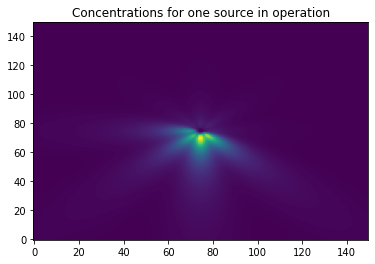

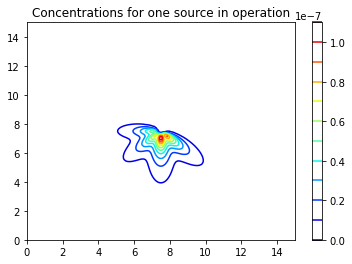

<Figure size 432x288 with 0 Axes>

In [12]:
import numpy as np
import scipy.optimize as spopt
import matplotlib.pyplot as plt

import getinput
import output
import domain
import ge

#get domain and dispersion characteristics
domainParams, dispersionParams = getinput.getInputData("domain.txt", "dispersion.txt")

#get source characteristics
sourceParams_main = getinput.getSourceData("sourceMain.txt")

#define stability classes 
stabilityClass = ["A", "B", "C", "D", "E", "F"]

#Compute concentration values for whole domain, for every wind direction and for specified stability class 
concentrationField = ge.gaussDispEq_TotalConcField(sourceParams_main, dispersionParams, domainParams, stabilityClass[0])

#Show concentration values as a 2D graphs
title = 'Concentrations for one source in operation'
plt.imshow(concentrationField, cmap='viridis', origin='lower', aspect='auto')
plt.title(title)
plt.show()
plt.clf()
#print contour version of 2D graph
x = np.linspace(0, domainParams[0], domainParams[2])
y = np.linspace(0, domainParams[1], domainParams[2])
X, Y = np.meshgrid(x, y)
cnt = plt.contour(X, Y, concentrationField, 10, cmap="jet")
plt.colorbar()
plt.title(title)
plt.show()
plt.clf()


### Výpočet imisného zaťaženia z viacerých zdrojov
Nasledujúci blok kódu vypočíta súhrnné koncentrácie (ako súčet všetkých koncentračných príspevkov všetkých uvažovaných zdrojov) v jednotlivých uzloch mriežky výpočtovej oblasti a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii).

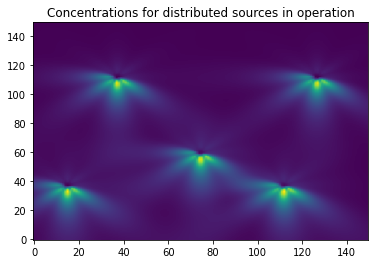

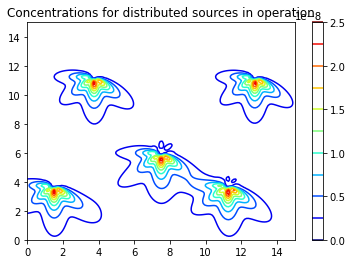

<Figure size 432x288 with 0 Axes>

In [13]:
#get characteristics of all sources
sourceParams_01 = getinput.getSourceData("sourceDistributed_01.txt")
sourceParams_02 = getinput.getSourceData("sourceDistributed_02.txt")
sourceParams_03 = getinput.getSourceData("sourceDistributed_03.txt")
sourceParams_04 = getinput.getSourceData("sourceDistributed_04.txt")
sourceParams_05 = getinput.getSourceData("sourceDistributed_05.txt")

#creates list of all sources (including the previos "main source", for use in next sections)
sourceParams_all = [sourceParams_main, sourceParams_01, sourceParams_02, sourceParams_03, sourceParams_04, sourceParams_05]

#compute concentration fields for 1.main source and for 2. all distributed sources in simultaneous operation
totalConcField_MainSource, totalConcField_SmallSources = ge.totalConcFields_MainSmall(sourceParams_all, dispersionParams, domainParams, "A" )

#Show concentration values for distributed sources as a 2D graphs
title = 'Concentrations for distributed sources in operation'
plt.imshow(totalConcField_SmallSources, cmap='viridis', origin='lower', aspect='auto')
plt.title(title)
plt.show()
plt.clf()
#print contour version of 2D graph
x = np.linspace(0, domainParams[0], domainParams[2])
y = np.linspace(0, domainParams[1], domainParams[2])
X, Y = np.meshgrid(x, y)
cnt = plt.contour(X, Y, totalConcField_SmallSources, 10, cmap="jet")
plt.colorbar()
plt.title(title)
plt.show()
plt.clf()


### Teoretické odôvodnenie - optimálna kombinácia výkonov viacerých zdrojov
Pre v praxi pomerne bežnú situáciu nahrádzania veľkých centrálnych zdrojov tepla malými distribuovanými zdrojmi je, s ohľadom na vyššie spomínanú lineárnosť Gaussovej rovnice vo vzťahu k celkovému hmotnostnému toku navyše možné skúmať rôzne kombinácie výkonov spaľovacích zariadení (a tomu zodpovedajúce kombinácie hmotnostných tokov) s cieľom zistiť kombináciu výkonov, ktorá zabezpečí minimalizáciu celkového imisného zaťaženia územia pri zachovaní celkového spaľovacieho výkonu (a teda celkového požadovaného množstva tepla).
Výpočet celkového imisného príspevku daného zdroja vo zvolenej oblasti je možné riešiť ako jednoduchý súčet vypočítaných koncentrácií vo všetkých výpočtových bodov oblasti.  Výsledkom je jedno číslo, ktoré predstavuje celkovú úroveň imisného zaťaženia  daného územia pre maximálny výkon jedného zdroja.
Hodnoty takto vypočítaných imisných zaťažení pre všetky zdroje a triedy stability je možné zostaviť do matice:


$$
C = 
\left[
\begin{matrix}
\lVert C_{1A} \rVert & . & \lVert C_{nA} \rVert \\
. & . & . \\
\lVert C_{1E} \rVert & . & \lVert C_{nE} \rVert
\end{matrix} \tag{3-1}
\right]
$$

kde: 
\
&emsp; $\lVert C_{iX} \rVert$ je celkový imisný príspevok i-teho zdroja (pri jeho plnom výkone) a pri triede stability atmosféry X

Riešenie maticovej rovnice 

$$
C*x = \lVert C_{TOT} \rVert
$$

kde: 

$$
\left[
\begin{matrix}
x_{1} \\
. \\
x_{n} \\
\end{matrix} \tag{3-1}
\right]
$$

je vektor skutočných výkonov jednotlivých uvažovaných zdrojov (ako podiel maximálneho výkonu), a


$$
\left[
\begin{matrix}
\lVert C_{TOT,A} \rVert \\
. \\
\lVert C_{TOT,E} \rVert \\
\end{matrix} \tag{3-1}
\right]
$$
\
je vektor celkových imisných príspevkov všetkých zdrojov pri ich skutočných výkonoch pre príslušné triedy stability, ktorá pre viazaný vektor $x$ (s 1-normou rovnajúcou sa celkovému požadovanému výkonu) minimalizuje 1-normu vektora $\lVert C_{TOT} \rVert$ je potom hľadanou kombináciou výkonov spaľovacích zariadení minimalizujúcou celkové imisné zaťaženie územia.

### Výpočet optimálnej kombinácie výkonov viacerých zdrojov
Nasledujúci blok vypočíta celkové imisné príspevky každého zdroja pri jeho plnom výkone pre všetky triedy stability atmosféry (kumulatívne príspevky pre všetky zdroje a triedy stabilty) sú ukladané do matice cumulativeImission. \
Následne, s využitím funkcie scipy.optimize.minimize() hľadá kombináciu výkonov všetkých zdrojov ako viazané minimum maticového súčtu cumulativeImission*x, s podmienkou celkového výkonu všetkých zdrojov rovných 1 a povoleným intervalom pre jednotlivé čiastkové výkony v rozmedzí <0,1>:

In [14]:
#Compute cumulative imission concentration (through whole domain) for each stability class and for each source (at nominal power) 
sourceCount = len(sourceParams_all)
stabClassCount = len(stabilityClass)
cumulativeImission = np.zeros(shape = (stabClassCount,sourceCount))
for i in range(stabClassCount):
    for j in range(sourceCount):
        cumulativeImission[i,j] = ge.computeCumulativeImission(sourceParams_all[j], dispersionParams, domainParams, stabilityClass[i])

#compute power output of each source, for which the combined cumulative imissions of all sources for each classes are minimal
sourcePowerOutputs = ge.minimizeImissions(cumulativeImission)
print("\n\nOptimal power output for main source: ", sourcePowerOutputs[0])
for source in range(1,len(sourcePowerOutputs)):
    print("Optimal power output for distributed source no.", source, ": ",  sourcePowerOutputs[source])


/home/musiljuraj/1rls/vvp/vvp-DU/project/ge.py:40: RuntimeWarning: invalid value encountered in double_scalars
  sigma_z = (sigma_z_BclassCoef[0]*(xCoor/1000))*(1+sigma_z_BclassCoef[1]*(xCoor/1000))**sigma_z_BclassCoef[2]
/home/musiljuraj/1rls/vvp/vvp-DU/project/ge.py:41: RuntimeWarning: invalid value encountered in double_scalars
  sigma_y = (sigma_y_BclassCoef[0]*(xCoor/1000))*(1+sigma_y_BclassCoef[1]*(xCoor/1000))**sigma_y_BclassCoef[2]
/home/musiljuraj/1rls/vvp/vvp-DU/project/ge.py:44: RuntimeWarning: invalid value encountered in double_scalars
  sigma_y = (sigma_y_CclassCoef[0]*(xCoor/1000))*(1+sigma_y_CclassCoef[1]*(xCoor/1000))**sigma_y_CclassCoef[2]
/home/musiljuraj/1rls/vvp/vvp-DU/project/ge.py:47: RuntimeWarning: invalid value encountered in double_scalars
  sigma_y = (sigma_y_DclassCoef[0]*(xCoor/1000))*(1+sigma_y_DclassCoef[1]*(xCoor/1000))**sigma_y_DclassCoef[2]
/home/musiljuraj/1rls/vvp/vvp-DU/project/ge.py:46: RuntimeWarning: invalid value encountered in double_scalars
 



Optimal power output for main source:  0.2750836809792432
Optimal power output for distributed source no. 1 :  0.9748228630902058
Optimal power output for distributed source no. 2 :  0.16506615440491718
Optimal power output for distributed source no. 3 :  0.5003713428953416
Optimal power output for distributed source no. 4 :  0.9878289161670369
Optimal power output for distributed source no. 5 :  0.9964923176059098


/usr/lib/python3/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


a nasledujúci blok kódu vypočítava súhrnné koncentrácie pre všeky uvažované zdroje pri stanovenom optimálnom výkone a vypočítané koncentrácie reprezentuje v grafickej podobe (v skalárnej a "contour" verzii):

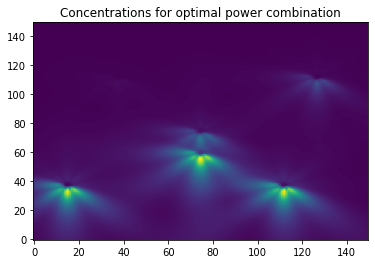

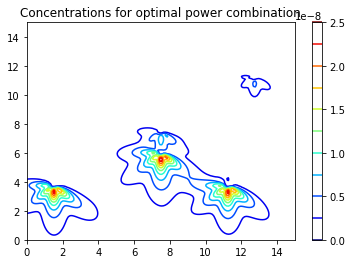

<Figure size 432x288 with 0 Axes>

In [16]:
#adjust source power output to optimal values
sourceParams_optimal_all = []
for source in range(0,len(sourcePowerOutputs)):
    sourceParams_optimal_all.append(sourceParams_all[source])
    sourceParams_optimal_all[source][6] = sourcePowerOutputs[source]*sourceParams_all[source][6]

#and compute total imission concentration with all sources running at this power output (example with stability class A)
totalConcField_Optimal = ge.gaussDispEq_TotalConcField(sourceParams_optimal_all[0], dispersionParams, domainParams, "A")
for source in range(1, len(sourceParams_optimal_all)):
    totalConcField_Optimal += ge.gaussDispEq_TotalConcField(sourceParams_optimal_all[source], dispersionParams, domainParams, "A")

#create graph with optimal imission concentration
title = 'Concentrations for optimal power combination'
plt.imshow(totalConcField_Optimal, cmap='viridis', origin='lower', aspect='auto')
plt.title(title)
plt.show()
plt.clf()
#print contour version of 2D graph
x = np.linspace(0, domainParams[0], domainParams[2])
y = np.linspace(0, domainParams[1], domainParams[2])
X, Y = np.meshgrid(x, y)
cnt = plt.contour(X, Y, totalConcField_Optimal, 10, cmap="jet")
plt.colorbar()
plt.title(title)
plt.show()
plt.clf()

#### Export dát
Nasledujúci blok kódu ukladá všetky vypočítané súhrnné koncentrácie (pre centrálny zdroj v samostatnej prevádzke, pre distribuované zdroje v samostatnej prevádzke a pre optimálnu kombináciu centrálneho a distribuovaných zdrojov) do csv súborov.
Rovnako ukladá 2D grafické znázornenia pre všetky vyššie uvedené varianty do .png súborov.

In [17]:
#save all computed concentration fields
np.savetxt("imissionConc_optimal.csv", totalConcField_Optimal, delimiter=",")
np.savetxt("imissionConc_main.csv", totalConcField_MainSource, delimiter=",")
np.savetxt("imissionConc_distributed.csv", totalConcField_SmallSources, delimiter=",")

#save the corresponding graphs
fileName = 'plot_optimal'
title = 'Concentrations for optimal power combination'
output.createGraphs(totalConcField_Optimal, fileName, title, domainParams)

fileName = 'plot_main'
title = 'Concentrations for main source in operation'
output.createGraphs(totalConcField_MainSource, fileName, title, domainParams)

fileName = 'plot_distributed'
title = 'Concentrations for distributed sources in operation'
output.createGraphs(totalConcField_SmallSources, fileName, title, domainParams)

<Figure size 432x288 with 0 Axes>